Цель: научится применять модели линейной регресси библиотеки scikit-learn к набору эмпирических данных

Дано: сsv-файл

Результат: эмпирическая формула

Ход выполнения:

Загрузить данные из файла.

Визуализировать загруженные данные (диаграмма рассеяния, график).

Разбить данные на обучающую и тестовую выборки.

Выбрать модель регрессии.

Обучить модель регрессии на обучающих данных.

Проверить качество полученной модели на тестовых данных.

Визуализировать результат.

Загрузим данные из CSV-файла с помощью библиотеки pandas.

In [ ]:
import pandas as pd

data = pd.read_csv('lab1-02.csv', header=None)

print("Первые строки данных:")
print(df.head())

Первые строки данных:
          x             y
0  1.323232   1443.073978
1  2.373737   1779.828149
2  8.878788  11710.737921
3  8.555556  10962.941786
4  2.858586   3494.724975


Построим диаграмму рассеяния для анализа распределения данных.

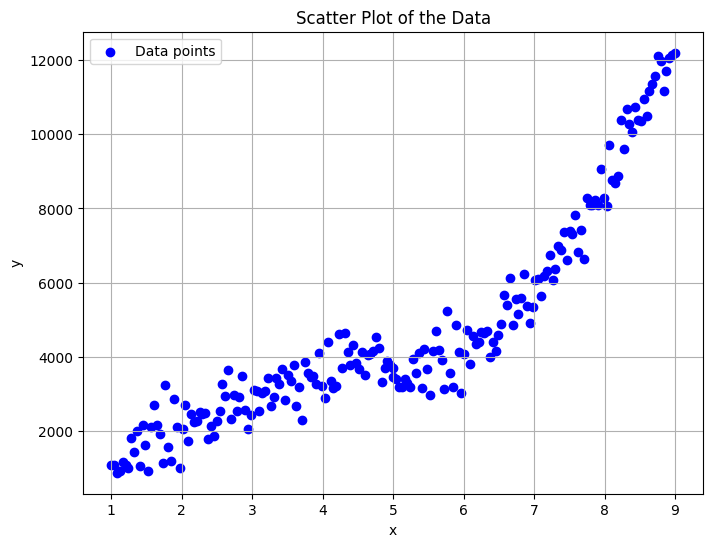

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', marker='o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid()
plt.show()

Разобьём данные на обучающую и тестовую выборки в соотношении 80/20.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим модель на тренировочных данных.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

Проверим качество модели на тестовых данных вычислив коэффициент детерминации.

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'{r2:.4f}')

0.8014


Построим график с линией регрессии и исходными данными.

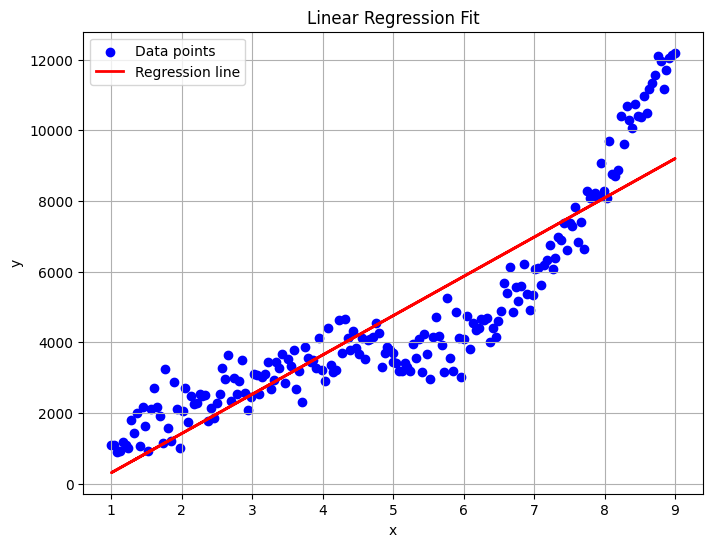

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', marker='o', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid()
plt.show()

Добавим также эмпирическую формулу, которая позволяет делать предсказания на основе входных данных

In [ ]:
print(f'Эмпирическая формула: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}')

Эмпирическая формула: y = 1111.5566x + -806.0064


Ниже приведен полный код

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('lab1-02.csv', header=None)
df.columns = ['x', 'y']

plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', marker='o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid()
plt.show()

X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'{r2:.4f}')

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', marker='o', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid()
plt.show()

print(f'Эмпирическая формула: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}')